In [4]:
# Importar bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [5]:
# Carregar o conjunto de dados Iris
iris = load_iris()
data = iris.data
target = iris.target

In [6]:
# Padronizar os dados (importante para o PCA)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Inicializar o modelo PCA com 2 componentes principais (para visualização)
pca = PCA(n_components=2)

# Ajustar o modelo aos dados padronizados e obter os componentes principais
principal_components = pca.fit_transform(data_standardized)

# Visualizar a variância explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
print("Variância explicada por cada componente principal:", explained_variance_ratio)

Variância explicada por cada componente principal: [0.72962445 0.22850762]


In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(principal_components) #Dados do pós PCA

# Adicionar os rótulos dos clusters aos dados originais
data_with_clusters = pd.DataFrame(data_standardized, columns=iris.feature_names)
data_with_clusters['Cluster'] = clusters
data_with_clusters

C:\Users\leona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,-0.900681,1.019004,-1.340227,-1.315444,1
1,-1.143017,-0.131979,-1.340227,-1.315444,1
2,-1.385353,0.328414,-1.397064,-1.315444,1
3,-1.506521,0.098217,-1.283389,-1.315444,1
4,-1.021849,1.249201,-1.340227,-1.315444,1
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2
146,0.553333,-1.282963,0.705921,0.922303,0
147,0.795669,-0.131979,0.819596,1.053935,2
148,0.432165,0.788808,0.933271,1.448832,2


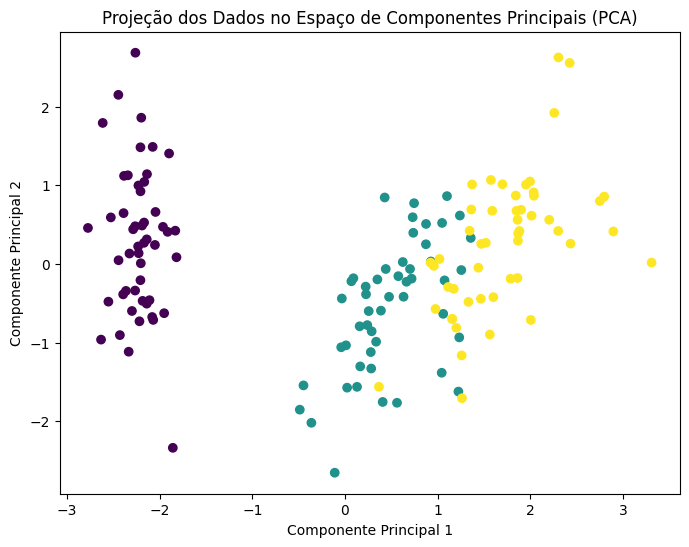

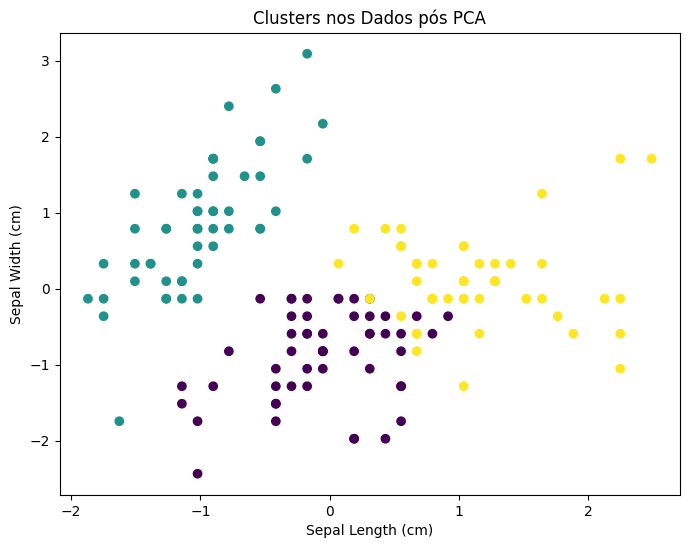

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=target, cmap='viridis')
plt.title('Projeção dos Dados no Espaço de Componentes Principais (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(data_with_clusters['sepal length (cm)'], data_with_clusters['sepal width (cm)'], c=clusters, cmap='viridis')
plt.title('Clusters nos Dados pós PCA')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()